In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
# Construct a tf.data.Dataset

ds = tfds.load('mnist', split='train')
# Data taken from MNIST dataset.

batch_size = 10
ds = ds.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE) # do .shuffle(buffer_size) to randomize batch set
# Divides ds into batches of size batch_size

# -- Note --
# * All the data provided was used for training data,
#   even though normally one would split the training data
#   and the testing data and assess the Neural Network performance
#   respcetively.

In [655]:
# Initialising the network

num_first_layer = 100
layer_1_weights = tf.Variable(tf.random.normal([num_first_layer, 784]), dtype = 'float32')
layer_1_bias = tf.Variable(tf.random.normal([num_first_layer]), dtype = 'float32')
output_layer_weights = tf.Variable(tf.random.normal([10, num_first_layer]), dtype = 'float32')
output_layer_bias = tf.Variable(tf.random.normal([10]), dtype = 'float32')

# --- Neural Network ---
# * 784 input neurons, since image is 28 x 28
# * First Layer consists of 100 Neurons
# * Output Layer consists of 10 Neurons

In [674]:
# Training the Neural Network

learning_rate = 0.1
cycles = 30

for j in range(cycles):
    
    for batch in ds:
        with tf.GradientTape(persistent = True) as g:
            error_func_over_examples = tf.constant(0, dtype = 'float32')
            for i1 in range(batch['image'].shape[0]):

                    g.watch(layer_1_weights)
                    g.watch(layer_1_bias)
                    g.watch(output_layer_weights)
                    g.watch(output_layer_bias)

                    test_image = tf.reshape(tf.image.convert_image_dtype(batch['image'][i1], dtype = 'float32'), 784)

                    network_1 = tf.math.sigmoid(tf.tensordot(layer_1_weights,  test_image , axes = 1) + layer_1_bias)
                    network_2 = tf.math.sigmoid(tf.tensordot(output_layer_weights, network_1, axes = 1) + output_layer_bias)

                    test_label = [0 if k != batch['label'][i1] else 1 for k in range(10)]
                    test_label = tf.constant(test_label, dtype = 'float32')
                    error_func = tf.reduce_sum((test_label - network_2) ** 2) # This is the distance from the actual answer
                    error_func_over_examples += (error_func / 10) # Every iteratio we add over the examples
                    

        layer_1_weights.assign_add(- g.gradient(error_func_over_examples, layer_1_weights) * learning_rate)
        layer_1_bias.assign_add(- g.gradient(error_func_over_examples, layer_1_bias) * learning_rate)
        output_layer_weights.assign_add(-g.gradient(error_func_over_examples, output_layer_weights) * learning_rate)
        output_layer_bias.assign_add(-g.gradient(error_func_over_examples, output_layer_bias) * learning_rate)
        
        
        
    correct_count = 0
    for batch in ds:
        for i1 in range(batch['image'].shape[0]):
            test_image = tf.reshape(tf.image.convert_image_dtype(batch['image'][i1], dtype = 'float32'), 784)
            network_1 = tf.math.sigmoid(tf.tensordot(layer_1_weights,  test_image , axes = 1) + layer_1_bias)
            network_2 = tf.math.sigmoid(tf.tensordot(output_layer_weights, network_1, axes = 1) + output_layer_bias)
            if tf.argmax(network_2).numpy() == batch['label'][i1].numpy():
                correct_count += 1
    print('cycle : ', j + 1)
    print('correct : ', correct_count / 60000)


cycle :  1
correct :  0.7335666666666667
cycle :  2
correct :  0.7418
cycle :  3
correct :  0.7470666666666667
cycle :  4
correct :  0.7515333333333334
cycle :  5
correct :  0.7562
cycle :  6
correct :  0.8168333333333333
cycle :  7
correct :  0.8337666666666667
cycle :  8
correct :  0.8398666666666667
cycle :  9
correct :  0.84345
cycle :  10
correct :  0.8471166666666666
cycle :  11
correct :  0.8649333333333333
cycle :  12
correct :  0.9247
cycle :  13
correct :  0.9310166666666667
cycle :  14
correct :  0.93455
cycle :  15
correct :  0.9376833333333333
cycle :  16
correct :  0.94015
cycle :  17
correct :  0.9415333333333333
cycle :  18
correct :  0.94375
cycle :  19
correct :  0.9451833333333334
cycle :  20
correct :  0.94675
cycle :  21
correct :  0.948
cycle :  22
correct :  0.9497
cycle :  23
correct :  0.9508166666666666
cycle :  24
correct :  0.9521
cycle :  25
correct :  0.9528666666666666
cycle :  26
correct :  0.9540166666666666
cycle :  27
correct :  0.9547333333333333
cyc

In [4]:
# Load weights and biases from npy file

layer_1_weights = np.load('layer_1_weights.npy')
layer_1_bias = np.load('layer_1_bias.npy')
output_layer_weights = np.load('output_layer_weights.npy')
output_layer_bias = np.load('output_layer_bias.npy')

I think the number is :  1
What the number actually is :  1


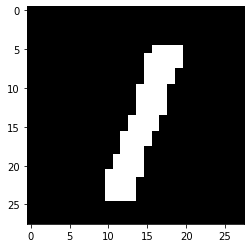

In [5]:
# See accuracy of individual digits.

correct_count = 0
batch_counter = 0
for batch in ds:
    batch_counter += 1
    if batch_counter == 1:
        i1 = 1
        test_image = tf.reshape(np.ceil(tf.image.convert_image_dtype(batch['image'][i1], dtype = 'float32')), 784)
        network_1 = tf.math.sigmoid(tf.tensordot(layer_1_weights,  test_image , axes = 1) + layer_1_bias)
        network_2 = tf.math.sigmoid(tf.tensordot(output_layer_weights, network_1, axes = 1) + output_layer_bias)
        print('I think the number is : ', tf.argmax(network_2).numpy())
        print('What the number actually is : ', batch['label'][i1].numpy())
        plt.imshow(tf.reshape(test_image, (28, 28)), cmap = 'gray')
        
# Note that above I have changed the image, such that the gray scale value is only either zero or one.
# Which is not what the neural network was trained on.

In [26]:
# See accuracy with regards to all the data.

correct_count = 0
batch_counter = 0
for batch in ds:    
    batch_counter += 1
    for i1 in range(batch['image'].shape[0]):
        test_image = tf.reshape(np.ceil(tf.image.convert_image_dtype(batch['image'][i1], dtype = 'float32')), 784)
#         print(test_image)
        network_1 = tf.math.sigmoid(tf.tensordot(layer_1_weights,  test_image , axes = 1) + layer_1_bias)
        network_2 = tf.math.sigmoid(tf.tensordot(output_layer_weights, network_1, axes = 1) + output_layer_bias)
        if tf.argmax(network_2.numpy()) == batch['label'][i1].numpy():
            correct_count += 1
print(correct_count / 60000)

# Note that above I have changed the image, such that the gray scale value is only either zero or one.
# Which is not what the neural network was trained on.

0.9227666666666666


In [837]:
# Save weights and biases.

np.save('layer_1_weights.npy',layer_1_weights.numpy())
np.save('layer_1_bias.npy', layer_1_bias.numpy())
np.save('output_layer_weights.npy', output_layer_weights.numpy())
np.save('output_layer_bias.npy', output_layer_bias.numpy())